# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz

In [176]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_regression

## Dataset

In [177]:
# Importa CSV del dataset
df = pd.read_csv('spotify_songs.csv')

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.

El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Fuentes

__*Original dataset:*__

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

__*API scraper repository:*__

https://github.com/charlie86/spotifyr/

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | Describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos bailable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


## Exploración y Comprensión de los Datos

In [178]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [180]:
df.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [181]:
df.sample(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
26900,0AGpftxgPuEUhFfWDE8zil,Wild Mind (feat. Tiffany Blom),Jay Hardway,41,2nmFDpMMfCm9Hn4zzL6piX,Wild Mind (feat. Tiffany Blom),2019-11-01,Electro House Top Tracks,1G0q0NK7g3C0XerNqq7GbL,edm,electro house,0.574,0.605,10,-6.193,1,0.0397,0.0963,0.0,0.206,0.242,127.952,197344
12042,0UFDKFqW2oGspYeYqo9wjA,Bleed It Out,Linkin Park,72,2tlTBLz2w52rpGCLBGyGw6,Minutes to Midnight,2007-05-14,L' ALBUM ROCK,0jilq2XZP9F2fwzp2k6iXK,rock,album rock,0.529,0.967,1,-3.647,0,0.0508,0.1140,0.0,0.610,0.596,140.127,166373
21094,7C86DVl6REN8VPeGEMOf9q,Get Busy,Sean Paul,61,3UdSdz4TjW3tjmTZE03Ehv,Dutty Rock,2002-11-12,"Hot Latino Mix (Latin, Hip Hop, Rap, RnB, Danc...",3hR2R6szlkwZeGyclTgHcF,latin,latin hip hop,0.735,0.824,10,-4.143,0,0.0360,0.6150,0.0,0.158,0.726,100.202,211666


In [182]:
df.tail(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.150,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.343,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.742,0.0894,127.984,337500


### Comprensión de features musicales del dataset

Exploramos los valores máximos y minimos de features específicos, aprovechando la posibilidad de buscar las canciones en Spotify para escucharlas.

In [183]:
"""
Para poder realizar una correcta exploración es necesario eliminar algunos outliers.
Al tratarse de un outliers extremos aparecen en el límite de cada feature, impidiendo la exploración.
Estas entradas serán removidas luego con los métodos de tratamiento de outliers.
En todos los casos, puede verificarse que no son pistas musicales.
"""
df_feat = df.copy()
df_feat = df_feat.drop(df_feat[df_feat['track_id'] == '51w6nRCU68klqNfYaaVP2j'].index)
df_feat = df_feat.drop(df_feat[df_feat['track_id'] == '5GR1vgM7Pppp888xQ0Db63'].index)
df_feat = df_feat.drop(df_feat[df_feat['playlist_id'] == '37i9dQZF1DX0ES2mnOVvai'].index)



#### Speechiness

In [184]:
# Speechiness
max_speechiness = df_feat['speechiness'].max()

# Obtenemos las canciones con el valor minimo de 'speechiness'
tracks_with_max_speechiness = df_feat[df_feat['speechiness'] == max_speechiness]

tracks_with_max_speechiness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
25705,5ZbJR1AfdOsvsYNuCvgqKX,I'M DEAD,Duckwrth,59,1JqHKxNhfBv3ZIz1VwhENp,I'M UUGLY,2016-09-23,Groovy // Funky // Neo-Soul,0JmBB9HfrzDiZoPVRdv8ns,r&b,neo soul,0.593,0.751,4,-9.414,0,0.918,0.707,0.0,0.356,0.485,114.907,230632


In [185]:
# Speechiness
min_speechiness = df_feat['speechiness'].min()

# Obtenemos las canciones con el valor mínimo de 'speechiness'
tracks_with_min_speechiness = df_feat[df_feat['speechiness'] == min_speechiness]

tracks_with_min_speechiness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11320,6r8cZQUc0zieslYpGuMmLj,Woman,John Lennon,1,3kYxJnL0ZW1ePbFmsbvYiN,Double Fantasy,1980-11-17,The Black Album,0KNLLunbFh9XgitPMOGmQg,rock,album rock,0.588,0.656,3,-6.373,1,0.0224,0.3780,0.002270,0.0420,0.746,79.701,212933
25257,14VwBAL1qSlG4ovOSYUQF4,Spend The Night,Rahsaan Patterson,43,1uMPGRwlgCjpIxjGTjg93c,Rahsaan Patterson,1997-01-01,Neo Soul Music,78RRvktrPMSqAoCI21mNOe,r&b,neo soul,0.683,0.546,2,-9.086,0,0.0224,0.0388,0.000169,0.0633,0.735,90.018,293400


Se aprecia que la variable 'speechiness' describe canciones con gran presencia de la voz (generalmente rapeadas).

#### Acousticness

In [186]:
# Acousticness máximo
max_acousticness = df_feat['acousticness'].max()

# Obtenemos las canciones con el valor máximo de 'speechiness'
tracks_with_max_acousticness = df_feat[df_feat['acousticness'] == max_acousticness]

tracks_with_max_acousticness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5373,5BBFzEZHejmSWKoFpcLM9F,Mary,Agnes Obel,42,3jTTLPuVcL6J9pgujnU1lS,Citizen of Glass,2016-10-21,Deep-deep Bubble Pop,744VClUYfFnZCDPcOUkg5G,pop,indie poptimism,0.486,0.183,7,-16.494,0,0.0379,0.992,0.0308,0.0886,0.075,122.833,347459


In [187]:
# Acousticness mínimo
min_acousticness = df_feat['acousticness'].min()

# Obtenemos las canciones con el valor mínimo de 'acousticness'
tracks_with_min_acousticness = df_feat[df_feat['acousticness'] == min_acousticness]

tracks_with_min_acousticness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
14216,3ttzGcgmxvD8iGyb3NEZVr,Scentless Apprentice,Nirvana,0,4HACR8HgOYj1HH4vCZ3MVi,In Utero - 20th Anniversary Remaster,1993-09-21,keg party jukebox,4PjiT7SWnUsTTTvKOuR76f,rock,permanent wave,0.32,0.833,1,-8.498,1,0.0478,0.000001,0.123,0.14,0.573,169.226,228053


Como puede verse un bajo 'acousticness' describe canciones con mucha distorsión, instrumentos eléctricos y sintetizadores, audio altamente procesado.

#### Instrumentalness

In [188]:
# Instrumentalness máximo
max_instrumentalness = df_feat['instrumentalness'].max()

# Obtenemos las canciones con el valor máximo de 'instrumentalness'
tracks_with_max_instrumentalness = df_feat[df_feat['instrumentalness'] == max_instrumentalness]

tracks_with_max_instrumentalness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
29202,2kWB9IV8EHDOU9EjgxWFrF,Sandstorm - Radio Edit,Darude,57,0SHWgw0LPDs37Go6oPdaqp,Sandstorm,1999,Trance Party 2019 by FUTURE TRANCE,2yofeyPwe0ZNmJHTrGz2Qt,edm,big room,0.526,0.978,11,-6.798,0,0.0471,0.142,0.987,0.11,0.62,136.079,226533


In [189]:
# Instrumentalness mínimo
min_instrumentalness = df_feat['instrumentalness'].min()

# Obtenemos las canciones con el valor mínimo de 'instrumentalness'
tracks_with_min_instrumentalness = df_feat[df_feat['instrumentalness'] == min_instrumentalness]

tracks_with_min_instrumentalness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.10200,0.0,0.0653,0.518,122.036,194754
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.08030,0.0,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.1270,0.07990,0.0,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.18700,0.0,0.1760,0.152,112.648,187675
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.0320,0.05670,0.0,0.0919,0.590,124.957,253040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,3Gwq0zKnMWluOEPKh93BeC,Lost At Sea,Zedd,51,7juWTdmjo0vYywWu8HiQxs,Clarity,2012-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.567,0.796,6,-3.534,1,0.0364,0.02470,0.0,0.1240,0.305,127.983,225840
32811,353JGhRW6ahVU3DpCxOjqW,Utopia - Radio Edit,Qubicon,11,466ziBbv68mP56uJom8uSL,Utopia,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.490,0.866,7,-3.152,1,0.0406,0.01820,0.0,0.1060,0.185,127.998,219844
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.613,0.775,6,-4.040,0,0.0409,0.00678,0.0,0.0677,0.391,127.906,204609
32827,0aBDrRTgDCwWbcOnEIp7DJ,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27,59XOfNjuYZB6feC6QUzS3e,Many Ways,2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.581,0.640,5,-8.367,1,0.0365,0.02660,0.0,0.5720,0.288,128.001,196993


Se confirma que la variable '​​Instrumentalness' alude a pistas instrumentales (sin cantantes).

#### Liveness

In [190]:
# Liveness máximo
max_liveness = df_feat['liveness'].max()

# Obtenemos las canciones con el valor máximo de 'liveness'
tracks_with_max_liveness = df_feat[df_feat['liveness'] == max_liveness]

tracks_with_max_liveness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11296,2da7wnI5OoV89TsdKMM81k,Knockin' On Heaven's Door - Live In London / 1992,Guns N' Roses,50,3ZwjaVcnVo2TwhK8N8WWVs,Live Era '87-'93,1999-01-01,This Is Guns N' Roses,37i9dQZF1DX74DnfGTwugU,rock,album rock,0.271,0.891,6,-6.011,1,0.0824,0.00188,0.0157,0.996,0.365,147.509,447160


In [191]:
# Liveness mínimo
min_liveness = df_feat['liveness'].min()

# Obtenemos las canciones con el valor mínimo de 'liveness'
tracks_with_min_liveness = df_feat[df_feat['liveness'] == min_liveness]

tracks_with_min_liveness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
10988,6zonhXHUitdQqZTqylx7Jf,Summer - Diplo & Grandtheft Remix,Calvin Harris,41,6wN6Mts7jYDFjzMG5m3fM8,Summer (Remixes),2014-06-20,Trap Nation 🔊,5aPwKjwNHr6dnCejLcPTVx,rap,trap,0.731,0.96,11,-4.453,0,0.0714,0.00389,0.0322,0.00936,0.61,140.014,267253


Como puede verse, la variable ‘Liveness' hace referencia a pistas con presencia del público.

#### Valence

In [192]:
# Valence máximo
max_valence = df_feat['valence'].max()

# Obtenemos las canciones con el valor máximo de 'valence'
tracks_with_max_valence = df_feat[df_feat['valence'] == max_valence]

tracks_with_max_valence

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
13531,7kigmgx2tJJsZHKaa2QC0w,Low Rider,War,36,4Y6E7J6tgFTcKCyvaktj5R,The Very Best Of War,2003-01-01,70's Classic Rock,76lrxCrKrGDkDDf3SVPnl3,rock,classic rock,0.815,0.676,0,-9.68,1,0.047,0.0825,0.662,0.0508,0.991,139.764,191333


In [193]:
# Valence mínimo
min_valence = df_feat['valence'].min()

# Obtenemos las canciones con el valor mínimo de 'valence'
tracks_with_min_valence = df_feat[df_feat['valence'] == min_valence]

tracks_with_min_valence

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32605,5LmQOpIkFAqhmSnbNurlT7,Computer Music,Hidden Empire,0,5Ffg7nxpSIdRaCOQJSdpWA,Trident,2016-11-25,Underground Party | Hypnotic | Minimal | Acid ...,29jj7pQlDqnWclbHQk21Rq,edm,progressive electro house,0.754,0.873,6,-9.758,0,0.0531,0.000094,0.704,0.133,0.0269,124.0,441977


Un alto valor de ‘Valence’ describe canciones “alegres”, que transmiten sentimientos “positivos”.

## Técnicas de Visualización

In [194]:
"""sns.pairplot(df)
plt.show()"""

'sns.pairplot(df)\nplt.show()'

Puede apreciarse que algunos features poseen gran cantidad de outliers. También es notable un sesgo en la distribución de ciertos features.

Nos interesa ver específicamente la relación entre 'track_popularity' y distintas features musicales.

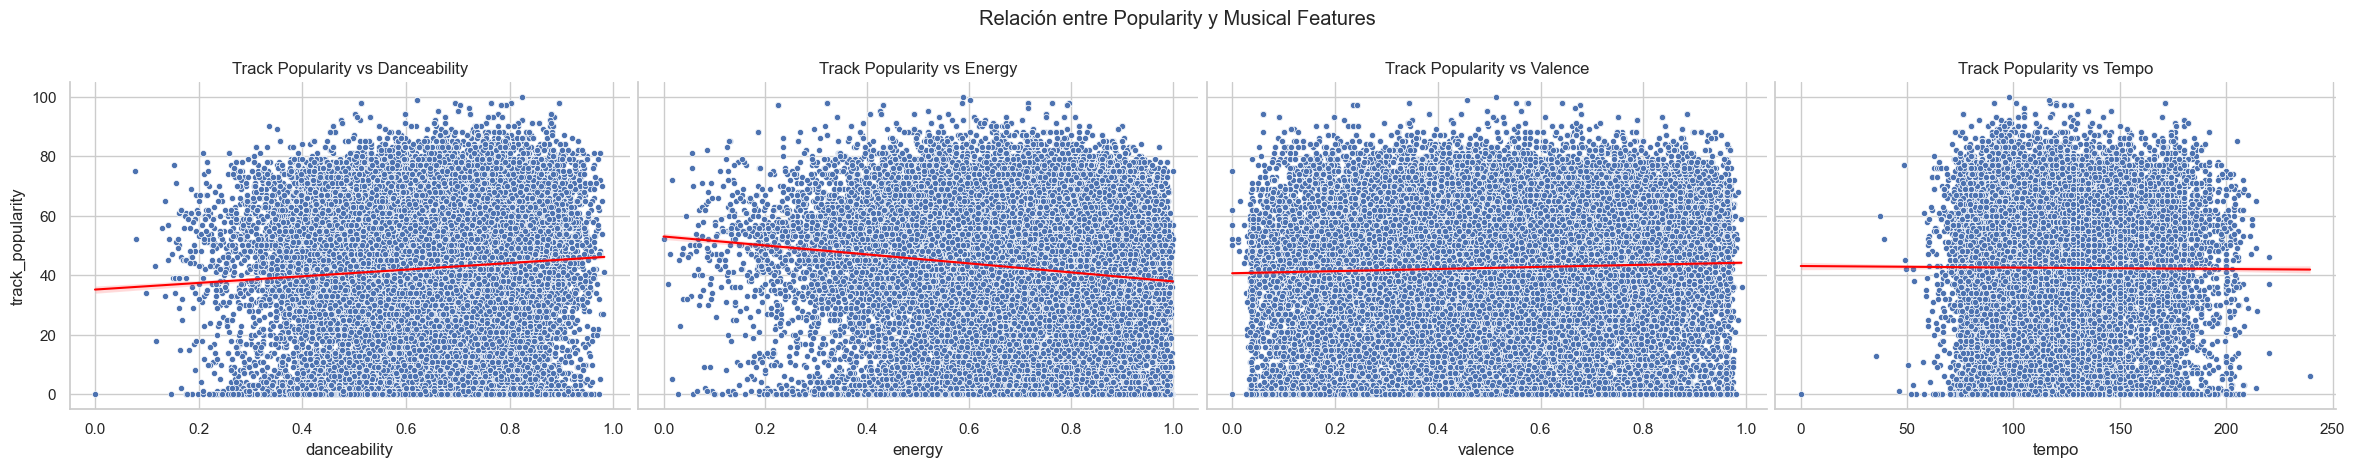

In [195]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio para agrandar los gráficos
                 kind='scatter',  # Scatter plot
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

Puede apreciarse que en todos los casos la correlación es muy baja. Puede concluirse que ni el Tempo ni la Valencia (positividad musical transmitida) tienen influencia sobre la popularidad.

Para 'Danceability' (musica bailable) y 'Energy' se aprecia una mínima correlación, pero no llega a ser determinante.

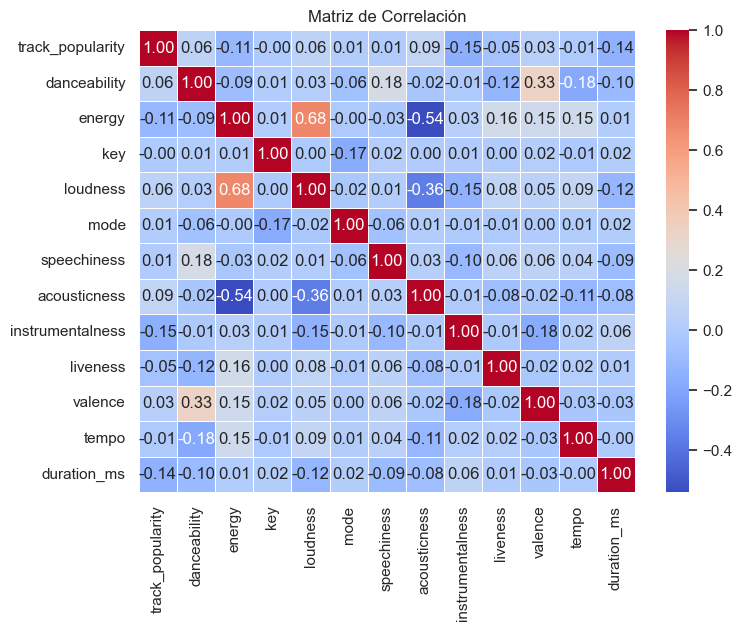

In [196]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Corroboramos la baja correlación entre la  mayoría de los features.

En los casos que se aprecia una correlación mayor (loudness/energy, acousticness/energy, loudness/acousticness), se trata de variables sintéticas, construidas en función de 'loudness' (parámetro acústico) y otras características del audio.

En el caso de 'valence/danceability' expresa una relación entre la música bailable y la "positividad" transmitida por la pista.

Podemos ver que 'track_popularity' presenta una baja correlación con todas las variables.
Sólo se aprecia una relación levemente mayor para: instrumentalness, duration_ms y energy.

Hipótesis:
- Relación 'instrumentalness/track_popularity': la música cantada (no instrumental) suele ser levemente más popular.
- Relación 'duration_ms/track_popularity': tienden a preferirse las canciones de una duración corta.
- Relación 'energy/track_popularity': a igualdad de condiciones, la pista con mayor volumen es preferida por los oyentes.

Cabe destacar que todas estas correlaciones son mínimas (menores a +/- 0.15).



En el pairplot se observó que algunos valores se encontraban con una distribución sesgada, por lo cual decidimos analizarlos en detalle.

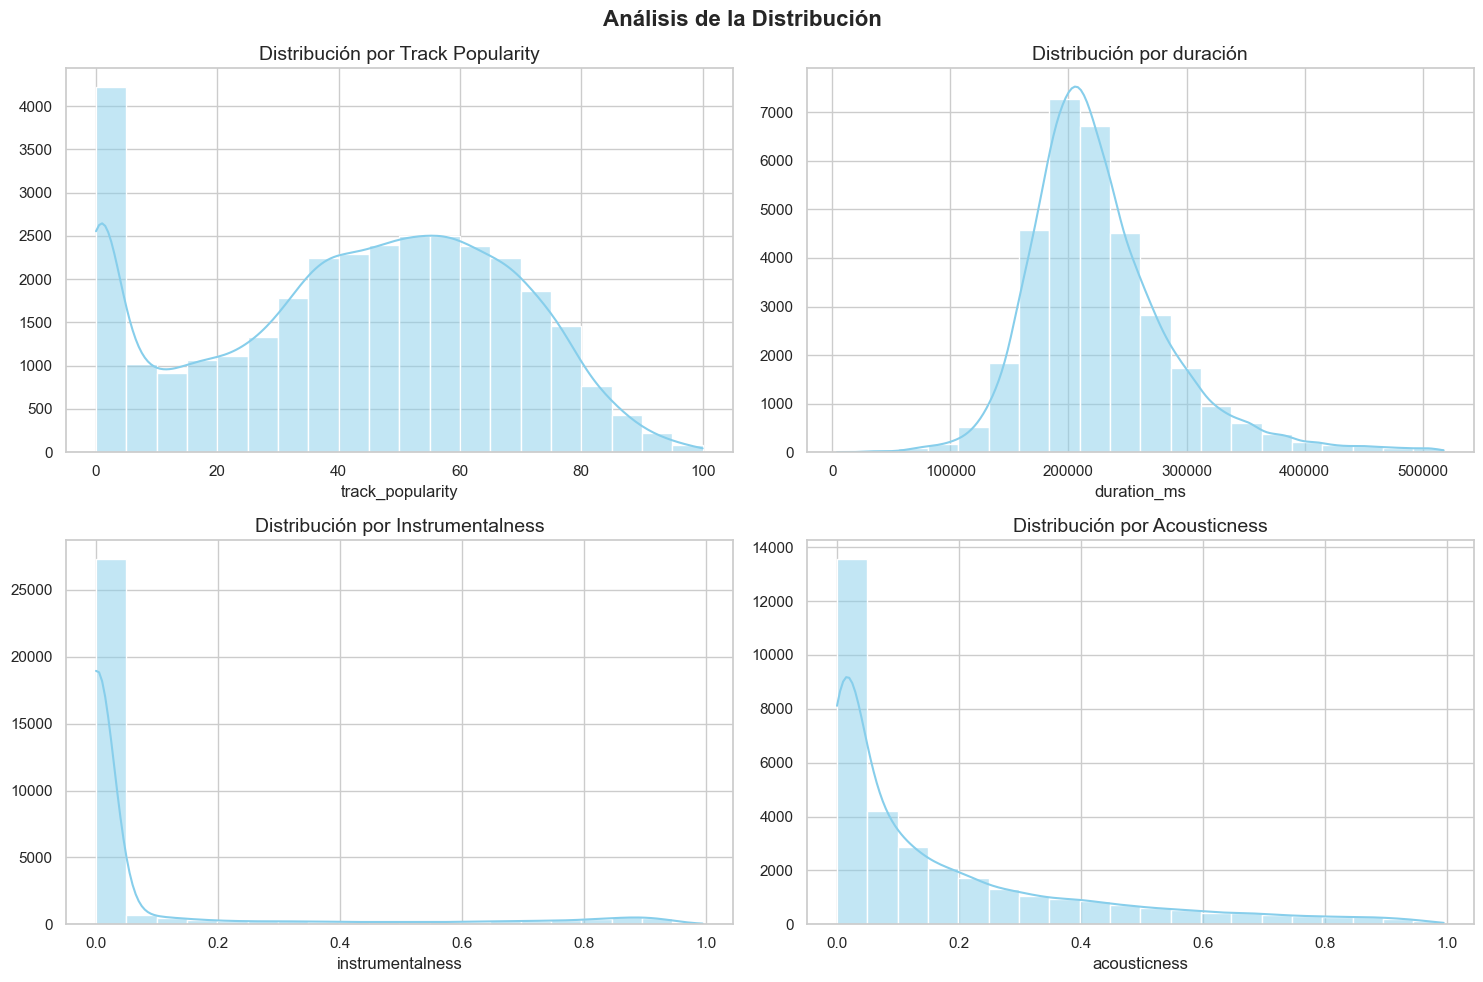

In [197]:
# Análisis de la distribución

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")
plt.title('Variables con igual rango (0 a 1)', fontsize=14)

# Graficamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Track Popularity', fontsize=14)
axes[0, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='duration_ms', bins=20, kde=True, color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Distribución por duración', fontsize=14)
axes[0, 1].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='instrumentalness', bins=20, kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Instrumentalness', fontsize=14)
axes[1, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='acousticness', bins=20, kde=True, color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Distribución por Acousticness', fontsize=14)
axes[1, 1].set_ylabel('')

plt.suptitle('Análisis de la Distribución', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

Existe un gran número de pistas con 'track_popularity' cercano a 0. Posiblemente porque no han sido rankeadas por falta de escuchas.

La mayoría de las canciones tienen una duración de 3 min 20 seg. Casi no hay pistas por debajo de 1 min 30 seg. En el extremo superior se aprecia una distribución de cola larga.

Tanto 'instrumentalness' como 'acousticness' están muy sesgados hacia la izquierda.

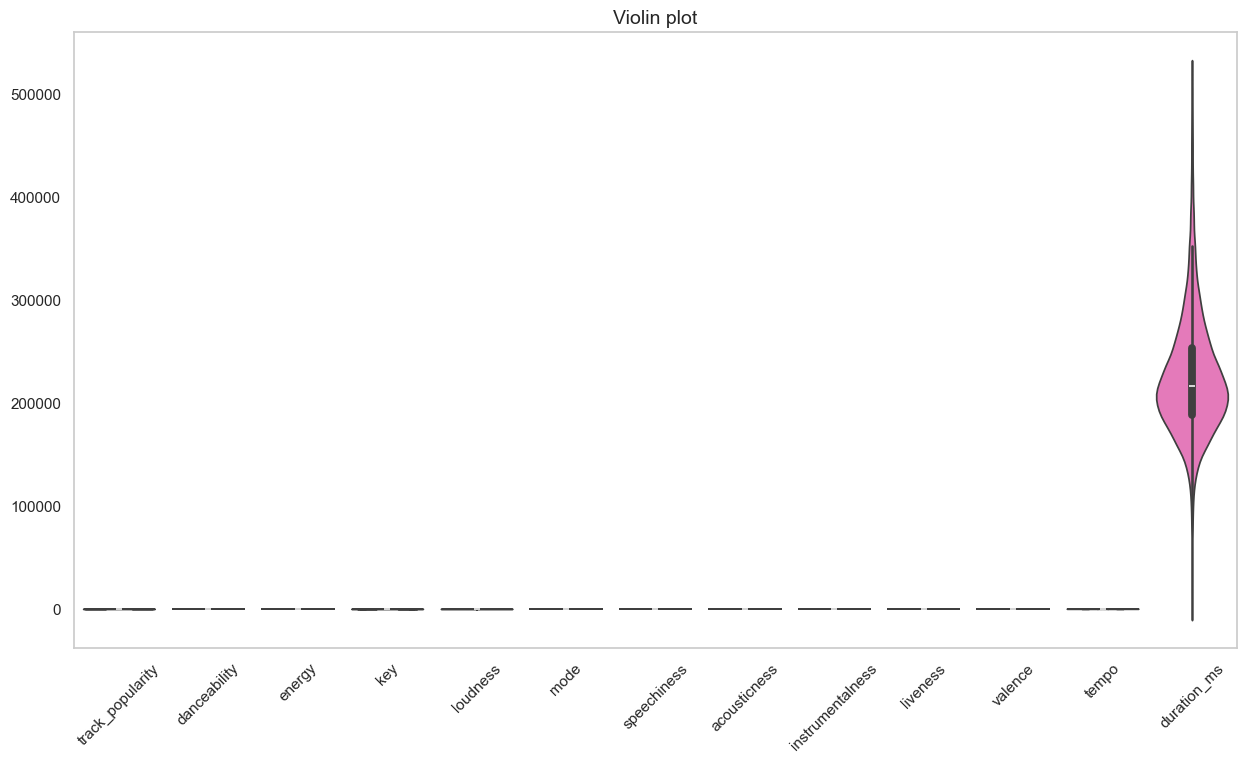

In [198]:
# Violin plot del dataset
plt.figure(figsize=(15, 8))
plt.title('Violin plot', fontsize=14)
sns.violinplot(data=df)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Decidimos separar las variables 'duration_ms', 'tempo' y 'track_popularity' en violin plot diferentes por tener un rango diferente que impide la visualización.

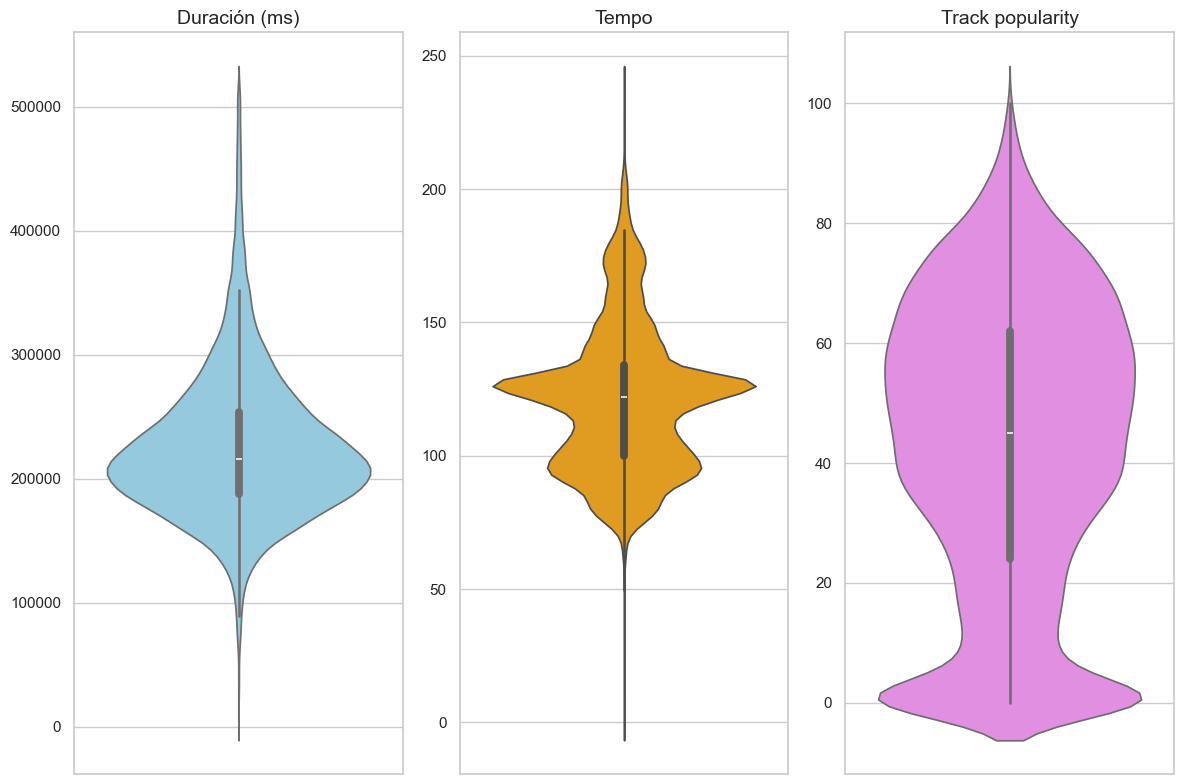

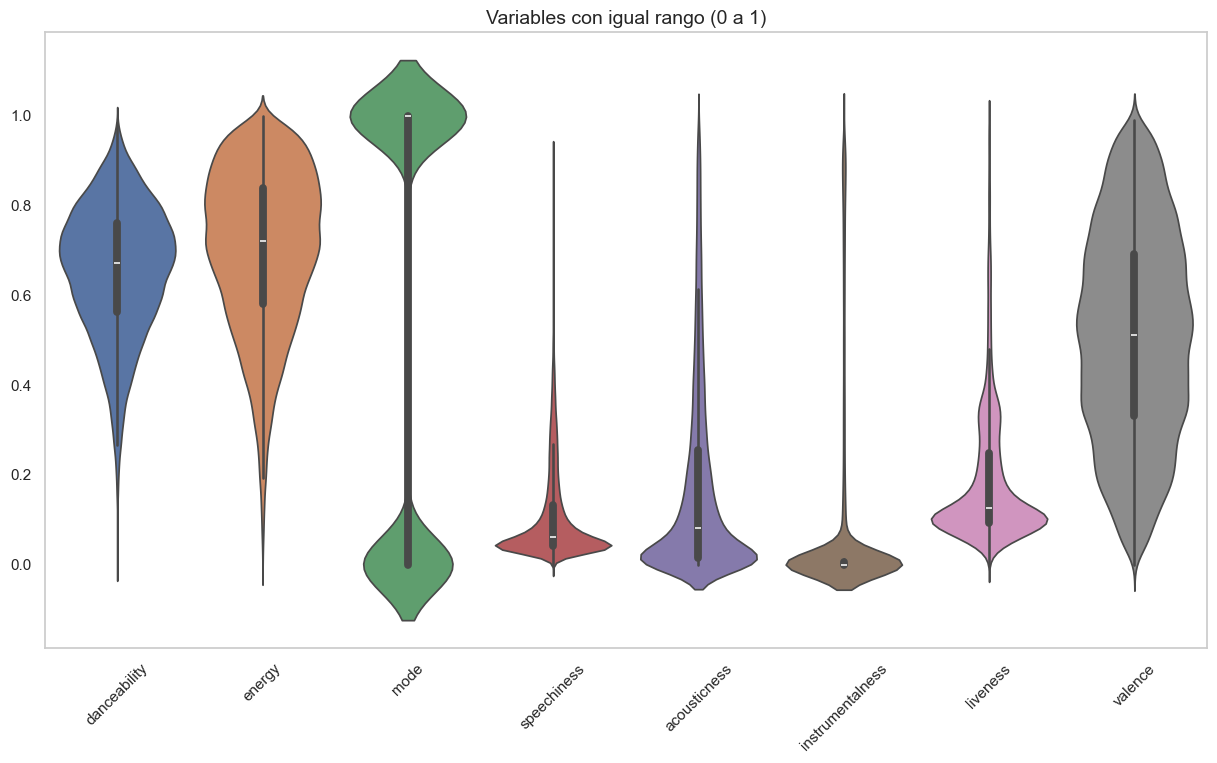

In [199]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Primer subplot (fila 0, columna 0)
sns.violinplot(ax=axes[0], data=df['duration_ms'], color='skyblue')
axes[0].set_title('Duración (ms)', fontsize=14)
axes[0].set_ylabel('')

# Segundo subplot (fila 0, columna 1)
sns.violinplot(ax=axes[1], data=df['tempo'], color='orange')
axes[1].set_title('Tempo', fontsize=14)
axes[1].set_ylabel('')

# Tercer subplot (fila 1, columna 0)
sns.violinplot(ax=axes[2], data=df['track_popularity'], color='violet')
axes[2].set_title('Track popularity', fontsize=14)
axes[2].set_ylabel('')
# Ajustar el layout para que los subplots no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot( data=df.drop(['duration_ms','tempo','track_popularity','loudness','key'],axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

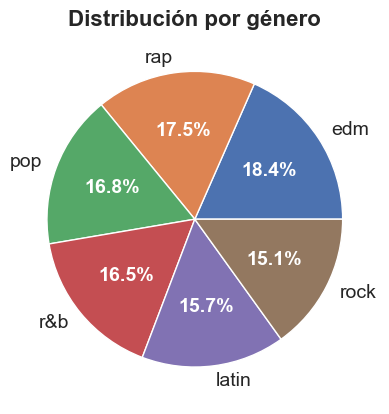

In [200]:
# Estudiamos la distrubición por género
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}  # Aumenta el tamaño del texto
)

# Aplicar estilos a los porcentajes (autotexts)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribución por género', fontsize=16, fontweight='bold')
plt.show()

El dataset se encuentra distribuido uniformemente para cada género.

In [201]:
def año_lanzamiento(date):
    if len(date) == 4:
        año = date
        return año
    else:
        año = pd.to_datetime(date, errors='coerce').year
        return año

In [202]:
# Creaamos un campo year en base al track_album_release_date
df['year'] = df['track_album_release_date'].apply(año_lanzamiento).astype(int)

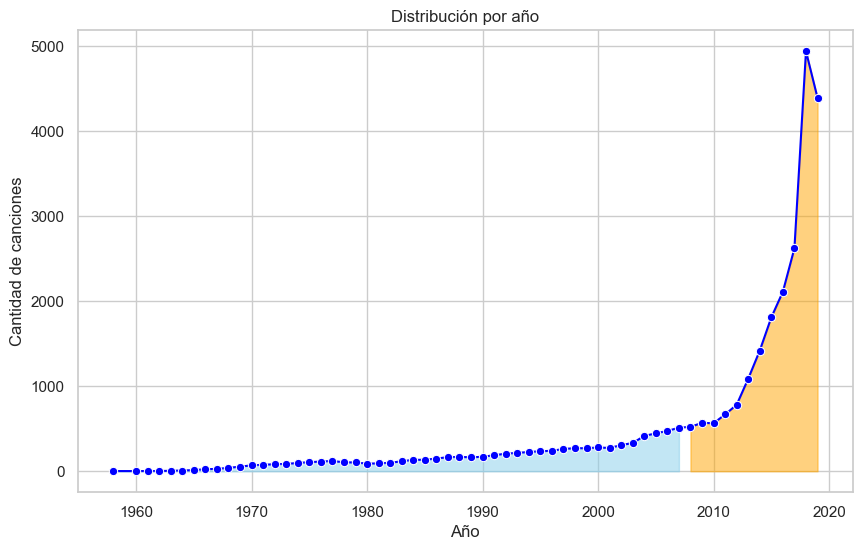

In [203]:
# Estudiamos la distribución de canciones por año

yearly_tracks = df['year'].value_counts().sort_index()
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Ploteo de la tendencia de distribucion por año

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2008, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2008, color='orange', alpha=0.5)

plt.show()

Queda claro que a partir de 2010 la cantidad de canciones publicadas por año (en Spotify) aumenta notablemente.

Es importante destacar que la aplicación se encuentra disponible desde 2008.

Las canciones publicadas antes de este año podría estar sufriendo un sesgo de supervivencia (sólo se agregan las canciones que han perdurado).

In [204]:
df.sample(15)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
11249,4qKcDkK6siZ7Jp1Jb4m0aL,Look Alive (feat. Drake),BlocBoy JB,79,7GGoJfKFOwDNuiLjjfzyCS,Look Alive (feat. Drake),2018-02-09,Trap Americana,7tkgK1tm9hYkWp7EFyOcAr,rap,trap,0.922,0.581,10,-7.495,1,0.2700,0.001040,0.000059,0.1050,0.595,140.022,181263,2018
5007,7axJj8BJF6UFqQIQfROvlN,So F**kin' Romantic - Tim Gunter Remix,Matthew Koma,30,1SeQSCM5UqOtrst4p7iuYV,So F**kin' Romantic (The Remixes),2015-08-14,Indie Poptimism!,4hKPJNFIhdAg4pAksn78FJ,pop,indie poptimism,0.669,0.798,11,-4.720,1,0.0591,0.007010,0.017000,0.0755,0.483,139.938,234857,2015
79,6wo37KVqFJhtuxPTpLCcfe,Takeaway (feat. Lennon Stella),The Chainsmokers,67,1JawI0XkEwmQ5Bwef3RMbq,World War Joy...Takeaway,2019-07-24,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.294,0.505,3,-8.106,1,0.0420,0.120000,0.000000,0.0977,0.357,85.332,209893,2019
13522,5R0v2GLujsGk37QCkGdvMQ,Rock Lobster - 45 Version,The B-52's,46,7HFc4IkKWXTSmrV60ZSEGI,Rock Lobster / 6060-842 [Digital 45],1979,70's Classic Rock,76lrxCrKrGDkDDf3SVPnl3,rock,classic rock,0.554,0.815,1,-12.481,1,0.0409,0.011100,0.048600,0.0511,0.600,90.889,295333,1979
18543,2wRkBumdItthjYP9XknImg,Está Rico,Marc Anthony,71,3ztJAikTd2AHTixfSPG185,Está Rico,2018-09-28,Fiesta Latina Mix 🎈🎉💃🏻🕺🏻☀️🏖,2kY6lVc5EcVfI5WNKmPQQG,latin,latin pop,0.817,0.740,11,-4.566,0,0.2830,0.266000,0.000000,0.0992,0.674,130.040,215151,2018
5630,4q9OiG2pXGdP7xmcRRNFMt,High as Fuck,Thelonious Coltrane,52,409QmUUoaMMvTDxqSiMTPW,High as Fuck,2019-07-30,Jazz Vibes,37i9dQZF1DX0SM0LYsmbMT,rap,hip hop,0.720,0.332,7,-14.059,1,0.1440,0.190000,0.307000,0.1130,0.651,84.035,189661,2019
28551,5T3xR4qk2OuhwnAOruVtjb,Booyah - Original Mix,Showtek,0,1tBdHcGwY74NeqtxC7ptIv,Booyah,2013-09-02,Big Room House | Festival Bangers,5Bx5niVgi3qGQQw06C0RKq,edm,big room,0.739,0.953,11,-2.624,1,0.1330,0.008010,0.010400,0.0623,0.516,127.987,311211,2013
5744,5Im6v7WQdNsp7KNWeKSHTy,Cereal Keef,7apes,4,2iKStDK4KbeyadfkYzVCAC,Marbles,2018-05-22,Lush Lofi,37i9dQZF1DXc8kgYqQLMfH,rap,hip hop,0.897,0.386,11,-8.304,1,0.0930,0.300000,0.761000,0.1010,0.790,89.998,77333,2018
4158,1N5zNjjaie1MpYW4oTPqVZ,Keeping Me Under,Two Another,10,5GgzoCTpVmmxGoETRWBa4l,Keeping Me Under,2016-03-11,Indie/Jazz Poptimism,6OaTudLqBEuTyUMPxRNpZc,pop,indie poptimism,0.795,0.549,2,-7.791,1,0.0880,0.135000,0.000109,0.1150,0.582,108.012,218926,2016
30137,73TU1voolT9RHWGLOHyM0J,Titanium (feat. Sia) - Alesso Remix,David Guetta,46,7tmMk6qGP9CmHOkJWEtsdU,Titanium (feat. Sia),2011-12-09,EDM - pop remixes,0cvVad4XizGbOS0vlwZYS5,edm,pop edm,0.696,0.652,0,-6.826,0,0.0461,0.003260,0.670000,0.0894,0.130,125.981,403810,2011


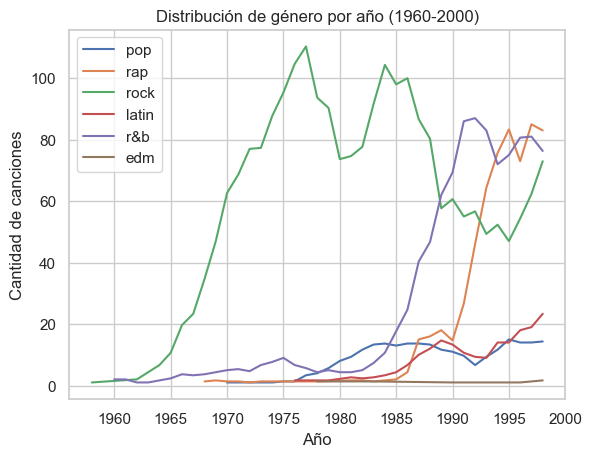

In [205]:
#Distribución de género por año
genres = df['playlist_genre'].unique()
df_yr = df[df['year'] < 2000]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de género por año (1960-2000)')
#plt.yscale('log')
plt.legend()
plt.show()


Puede verse la evolución de los distintos géneros a través de los años.

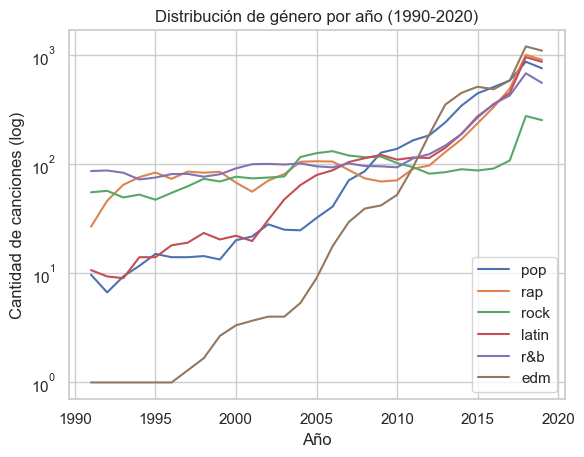

In [206]:
#Distribución de género por año
df_yr = df[df['year'] >= 1990]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones (log)')
plt.title('Distribución de género por año (1990-2020)')
plt.yscale('log')
plt.legend()
plt.show()

Es destacable el surgimiento del género 'edm' a partir 1995 y el declino del 'rock' a partir de 2010.

En 2017 se produce un incremento similar de la cantidad de canciones en todos los géneros.

## Limpieza del Dataset

### Identificación de valores nulos

track_id            0
track_name          5
track_artist        5
track_popularity    0
track_album_id      0
                   ..
liveness            0
valence             0
tempo               0
duration_ms         0
year                0
Length: 24, dtype: int64


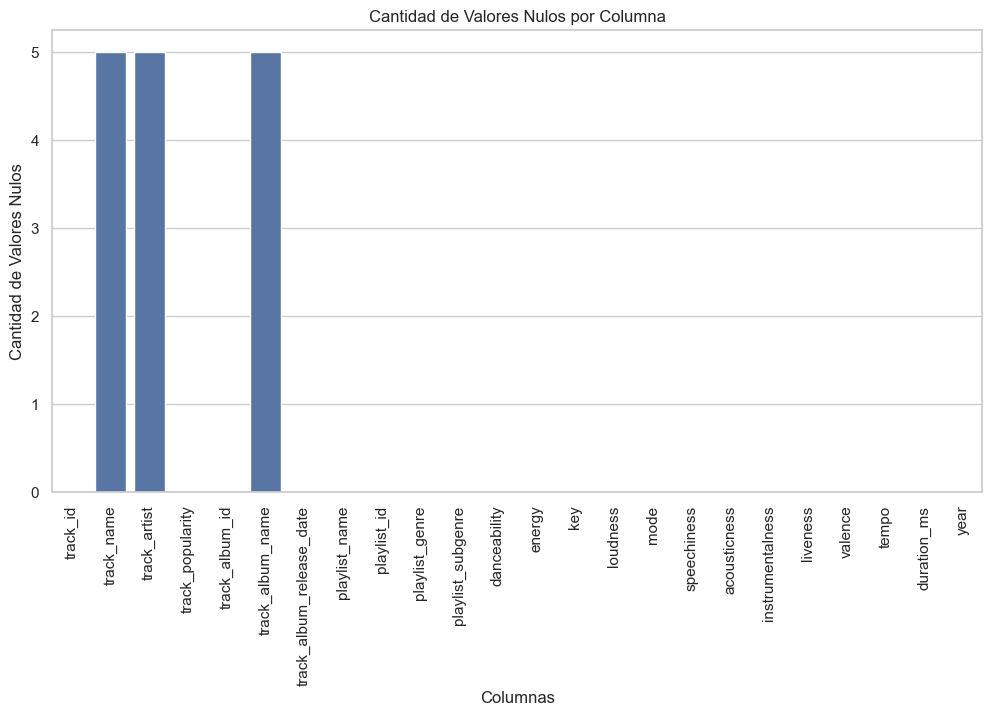

In [207]:
# Vemos la cantidad de valores nulos por cada campo
null_counts = df.isnull().sum()
print(null_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=90)
plt.show()

Se identifican 5 pistas que no tienen información de 'track_name' y 'track_artist', posiblemente se trata de las mismas canciones.

In [208]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,2017
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,2017
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,2012
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012


Se observó que los features musicales tenían valores normales en relación al resto del dataset. Por ese motivo se decidió conservar estas canciones.

### Tratamiento de duplicados

Verificamos si había canciones ingresadas más de una vez al dataset (mismo track_id) y eliminamos los duplicados.

In [209]:
# Búsqueda de duplicados
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
3ZCTVFBt2Brf31RLEnCkWJ     8
6oJ6le65B3SEqPwMRNXWjY     8
                          ..
27F9FlipD657qYRQT3qxFm     2
5N5k9nd479b1xpDZ4usjrg     2
3kgKVcBpBGuSeaEC0AZGlb     2
1BmdqDrBU5eohtRwHBls6C     2
4JxXwBcVpVGDAnY4tKcAFH     2
Name: count, Length: 3166, dtype: int64


In [210]:
df.loc[df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,post-teen pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,electropop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,indie poptimism,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,southern hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,tropical,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,hip pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,pop edm,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016


Pudimos ver que las entradas duplicadas están en diferentes playlists, pero se trata siempre de la misma canción, con los mismos features musicales.

El único valor conflictivo es 'playlist_genre' ya que no necesariemente es descriptivo del género real de la canción. Decidimos conservar sólo la primer entrada a modo descriptivo.

In [211]:
# Eliminación de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [212]:
# Verificación
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

Series([], Name: count, dtype: int64)


### Tratamiento de outliers

#### Variable track_popularity

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deberse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoción, artista desconocido) que exceden la información del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlación.

In [213]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28356, dtype: bool


2620

Con base en el histograma anterior de distribución de 'track_popularity' se determinó realizar un corte de los valores menores a 10, por ser el límite de separación de ambos picos.

In [214]:
# Eliminamos las canciones con track_popularity menor a 10
df = df[df['track_popularity'] > 10]


In [215]:
# Verificamos la eliminación de canciones con track_popularity menor a 10
unpopular_counts = df['track_popularity'] < 10
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

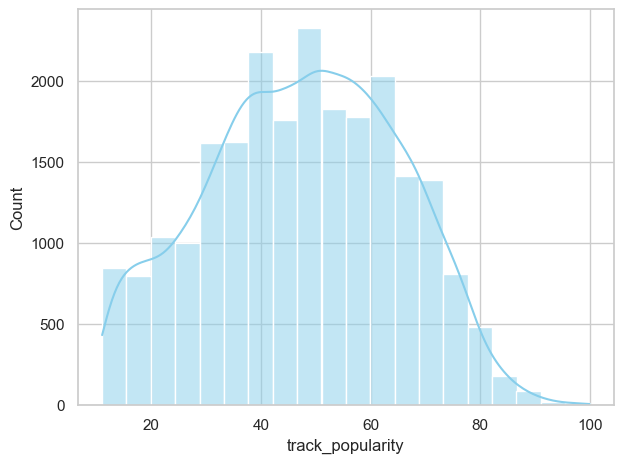

In [216]:
# Verificamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

#### Variable tempo

In [217]:
# Detección de outliers por método del desvío estándar.
data = df['tempo']
data_mean, data_std = np.mean(data), np.std(data)
cutoff = data_std*3
lower,upper = data_mean-cutoff, data_mean+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Copiamos el DataFrame original para comparar
df_original = df.copy()

# Eliminamos las canciones con tempo fuera de los límites establecidos
df = df[(df['tempo'] > lower) & (df['tempo'] < upper)]

print(f"Limite de corte inferior {round(lower,2)} bpm.")
print(f"Limite de corte superior {round(upper,2)} bpm.")
print(f"Se eliminan {len(outliers_idx)} entradas que exceden los límites de tempo.")

Limite de corte inferior 39.69 bpm.
Limite de corte superior 202.22 bpm.
Se eliminan 72 entradas que exceden los límites de tempo.


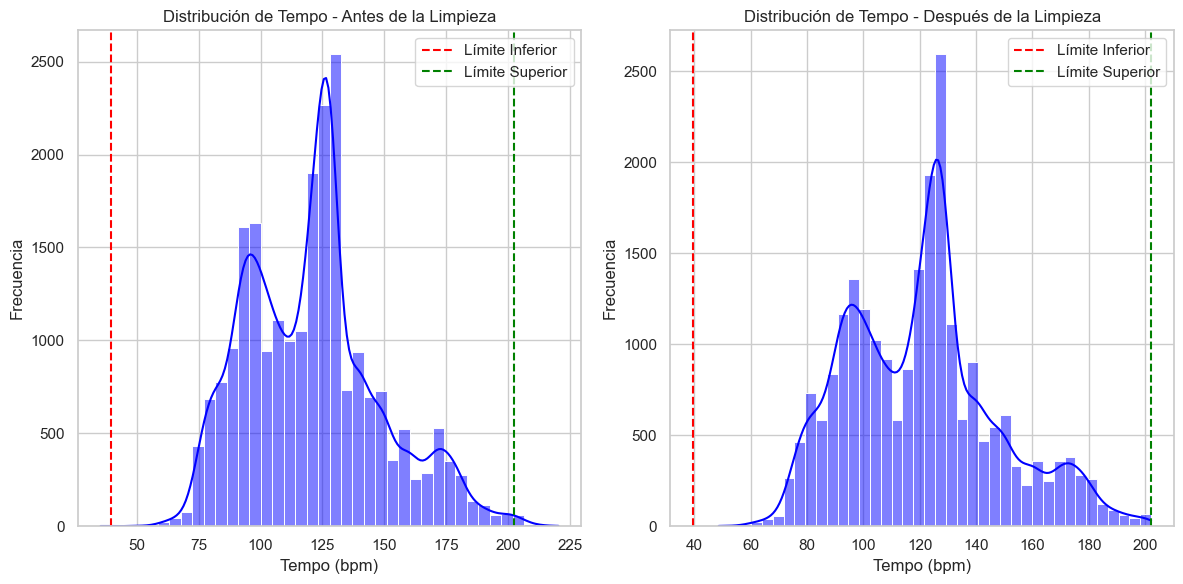

In [218]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Distribución de Tempo - Antes de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Distribución de Tempo - Después de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable duracion_ms

In [219]:
# Detección de outliers con método del rango intercuartílico (IQR)
# Análisis por cuartiles
df_original = df.copy()
data = df['duration_ms']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower,upper = q25-cutoff, q75+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Análisis por percentiles
q15, q85 = np.percentile(data, 15), np.percentile(data, 85)
iqr_per = q85 - q15
cutoff_per = iqr * 1.5
lower_per,upper_per = q15-cutoff_per, q85+cutoff_per
outliers_idx_per = np.argwhere((data<lower_per) | (data>upper_per))

In [220]:
print('Análisis por cuartiles:')
print('Límite inferior ',lower)
print('Límite superior ',upper)

Análisis por cuartiles:
Límite inferior  88289.75
Límite superior  347783.75


In [221]:
print('Análisis por percentiles:')
print('Límite inferior ',lower_per)
print('Límite superior ',upper_per)

Análisis por percentiles:
Límite inferior  73305.0
Límite superior  372711.8


Decidimos realizar el corte únicamente por el percentil inferior. Es decir, pistas con una duración menor a 1,2 min.

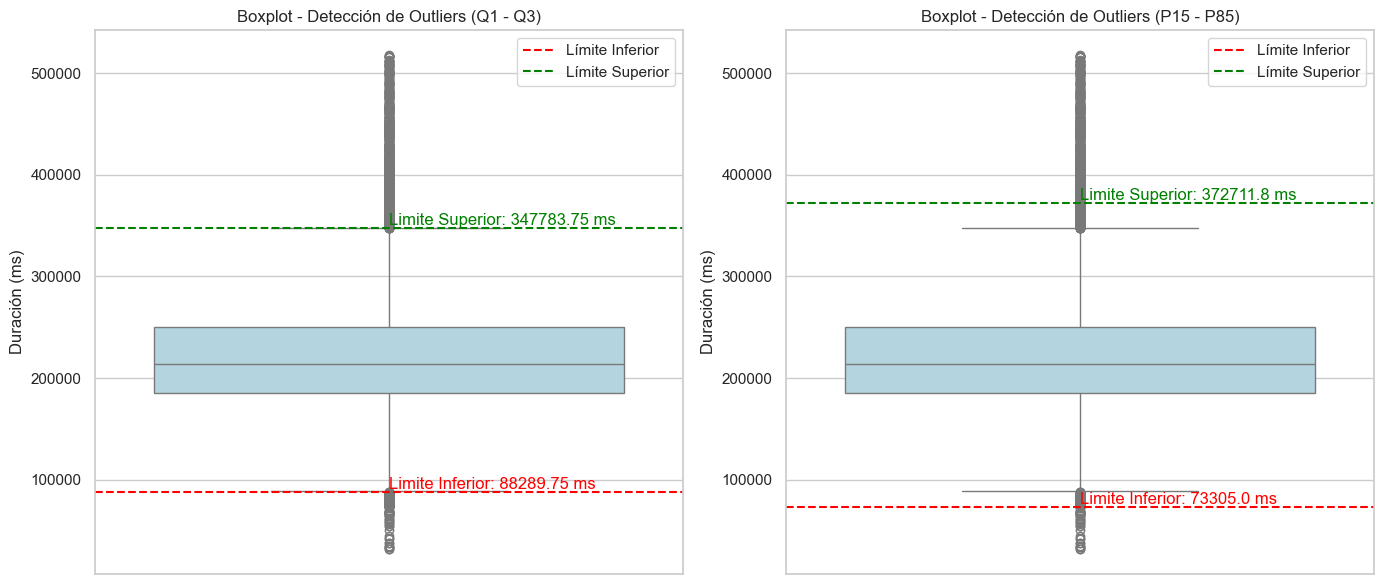

In [222]:
# Crear el gráfico
plt.figure(figsize=(14, 6))

# Boxplot para el análisis IQR
plt.subplot(1, 2, 1)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(upper, color='green', linestyle='--', label='Límite Superior')
plt.title('Boxplot - Detección de Outliers (Q1 - Q3)')
plt.ylabel('Duración (ms)')
plt.legend()

# Agregar texto con los valores límites
plt.text(0, lower, f'Limite Inferior: {round(lower, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper, f'Limite Superior: {round(upper, 2)} ms', color='green', verticalalignment='bottom')

# Boxplot para el análisis por percentiles
plt.subplot(1, 2, 2)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower_per, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(upper_per, color='green', linestyle='--', label='Límite Superior')
plt.title('Boxplot - Detección de Outliers (P15 - P85)')
plt.ylabel('Duración (ms)')
plt.legend()

# Agregar texto con los valores límites para percentiles
plt.text(0, lower_per, f'Limite Inferior: {round(lower_per, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper_per, f'Limite Superior: {round(upper_per, 2)} ms', color='green', verticalalignment='bottom')

plt.tight_layout()
plt.show()

In [223]:
# Eliminamos las canciones con duración fuera de los límites establecidos
df = df[df['duration_ms'] > lower_per]
outliers_idx_per = np.argwhere(data<lower_per)
print(f"Limite de corte inferior {round(lower_per,2)} ms.")
print(f"Se eliminan {len(outliers_idx_per)} entradas por debajo del límite de duración.")

Limite de corte inferior 73305.0 ms.
Se eliminan 39 entradas por debajo del límite de duración.


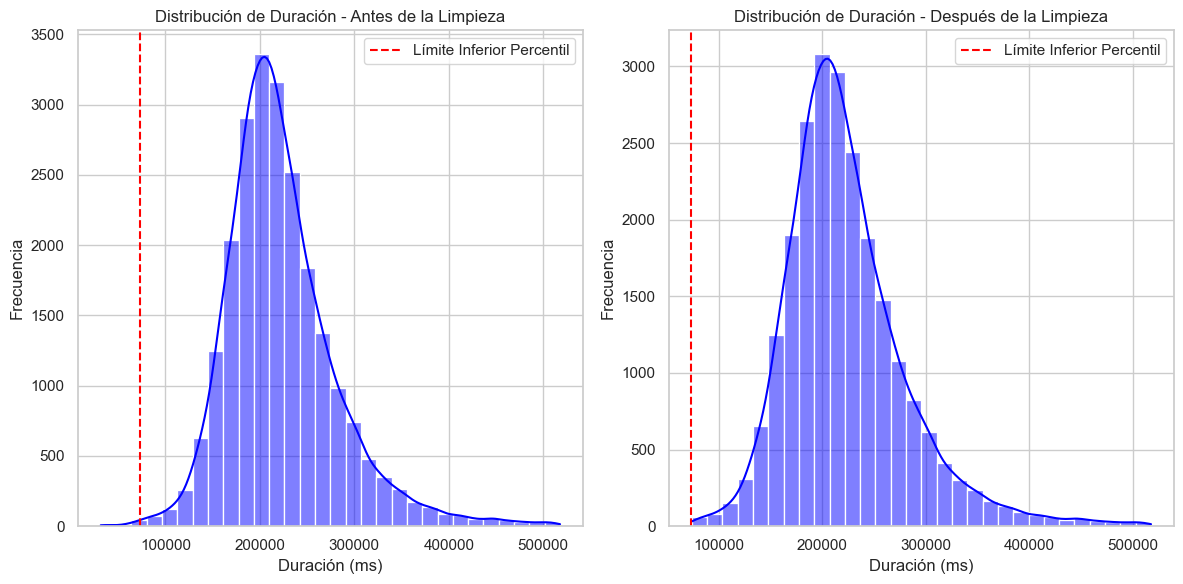

In [224]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='Límite Inferior Percentil')
plt.title('Distribución de Duración - Antes de la Limpieza')
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='Límite Inferior Percentil')
plt.title('Distribución de Duración - Después de la Limpieza')
plt.xlabel('Duración (ms)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable loudness

Identificamos que algunos outliers en la variable loudness, que presentaban pistas con un "volumen" extremadamente bajo.

In [225]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
df_original = df.copy()
loudness_threshold = -30
low_loudness_counts = df['loudness'] < loudness_threshold
print(low_loudness_counts)
print(f"Se identifica un total de {low_loudness_counts.sum()} pistas.")

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23085, dtype: bool
Se identifica un total de 4 pistas.


In [226]:
df[df['loudness'] < loudness_threshold]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
17008,34v7cD6VR3fVYguedQ1wuh,Tropical Forest,The Sleep Specialist,54,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.3110,0.377000,3,-36.509,0,0.0366,0.1290,0.979,0.2470,0.0388,84.122,117449,2017
17010,28ilcqErfNjitJ7T3byHoX,Peaceful Forest,The Sleep Specialist,51,3TRoUn8OKRVUcbprXmyGgj,Jungle And Forest Sounds,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.2110,0.425000,7,-46.448,0,0.0542,0.8800,0.613,0.1840,0.0122,116.884,181204,2017
17016,61SiFnjiY36uVSTBVXK5Yw,The Sound Of The Jungle With Coloured Birds Fo...,Life Sounds Nature,44,5qukUq6sBLjghcEcFOdgKP,"The Very Best Sound Of Nature - Birds, Waves, ...",2015-04-01,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.2260,0.442000,11,-36.624,0,0.0562,0.0509,0.136,0.0791,0.0234,77.998,93010,2015
17018,5iAB4tlYseBES4MKqgY4KG,Relaxing Crickets And Waterfall,Natural Sound Makers,52,2GLxsxoWpW8MOw9O9AAsf9,Forest By Night,2017-01-09,Tropical Nights,37i9dQZF1DX0ES2mnOVvai,latin,tropical,0.0787,0.000175,7,-35.960,1,0.0580,0.1180,0.972,0.0793,0.0116,169.062,264154,2017


Decidimos eliminarlos por no tratarse de pistas musicales, son grabaciones de sonidos de la naturaleza.

In [227]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > loudness_threshold ]

In [228]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23081, dtype: bool


0

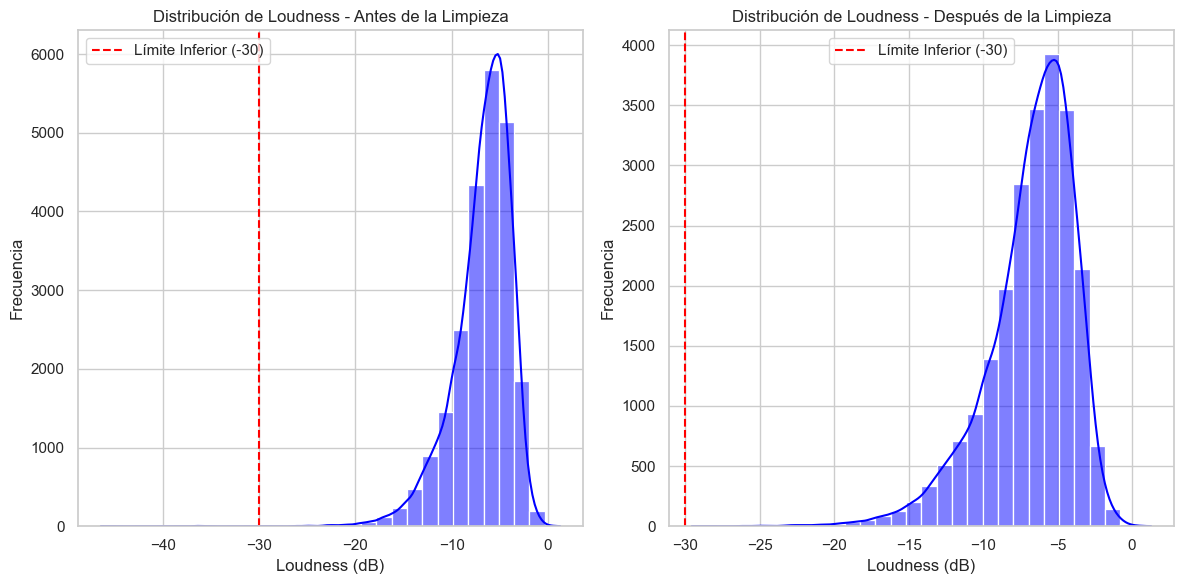

In [229]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='Límite Inferior (-30)')
plt.title('Distribución de Loudness - Antes de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='Límite Inferior (-30)')
plt.title('Distribución de Loudness - Después de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

## Transformación de Variables y Selección de Features

### Eliminación de features string

Eliminamos los features string que describen la pista, el album o la playlist. Únicamente conservamos 'track_id' para referencia y 'playlist_genre' que será usada más adelante.

In [230]:
df.drop(columns=['track_name', 'track_artist', 'track_album_id', 'track_album_name',  'playlist_subgenre', 'track_album_release_date', 'playlist_name', 'playlist_id'], inplace=True)

### Transformación de features musicales continuos en categóricos

In [231]:
df_cat = df.copy()

In [232]:
#LIMITES
# danceability: > 0.5 -> bailable
# speechiness: > 0.66 -> speech
# acousticness: > 0.5 -> acoustic 
# intstrumentalness: > 0.5 -> intstrumental 
# liveness: > 0.8 -> live 
# valence: 1 = positiva / 0 = negativa

df_cat.loc[:, 'danceability'] = df_cat['danceability'] > 0.5
df_cat.loc[:, 'speechiness'] = df_cat['speechiness'] > 0.66
df_cat.loc[:, 'acousticness'] = df_cat['acousticness'] > 0.5
df_cat.loc[:, 'instrumentalness'] = df_cat['instrumentalness'] > 0.5
df_cat.loc[:, 'liveness'] = df_cat['liveness'] > 0.8
df_cat.loc[:, 'valence'] = df_cat['valence'] > 0.5

/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_38933/845413608.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True ...  True  True  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'danceability'] = df_cat['danceability'] > 0.5
/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_38933/845413608.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'speechiness'] = df_cat['speechiness'] > 0.66
/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_38933/845413608.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False

In [233]:
df_cat.describe()

,track_popularity,energy,key,loudness,mode,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000
mean,47.624410,0.692901,5.353104,-6.806251,0.566613,120.734644,222975.296824,2011.467744
std,17.580487,0.183074,3.617693,2.986322,0.495554,26.690995,58376.217833,11.449411
min,11.000000,0.011800,0.000000,-29.561000,0.000000,48.718000,73777.000000,1957.000000
25%,35.000000,0.573000,2.000000,-8.267000,0.000000,99.962000,185742.000000,2009.000000
50%,48.000000,0.716000,6.000000,-6.260000,1.000000,121.915000,213989.000000,2017.000000
75%,61.000000,0.836000,9.000000,-4.722000,1.000000,134.364000,250583.000000,2019.000000
max,100.000000,1.000000,11.000000,1.275000,1.000000,202.134000,517810.000000,2020.000000


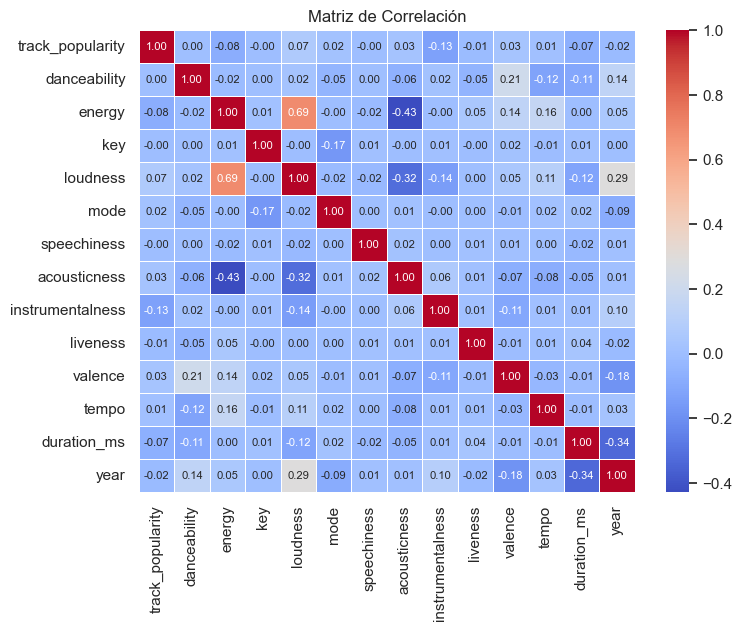

In [234]:
# Seleccionar solo columnas numéricas
numeric_df = df_cat.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Puede verse que esta transformación empeora en todos los casos la correlación, por lo que será desestimada.

### Escalado de features numéricas

Realizamos un escalado 'MinMaxScaler' para trabajar con valores de rango [0, 1] en todas las features.

In [235]:
# Escalado de variables
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000,23081.000000
mean,0.411510,0.656292,0.692901,5.353104,0.737928,0.566613,0.107680,0.183468,0.085304,0.188438,0.509312,0.469421,0.336007,0.864567
std,0.197534,0.145038,0.183074,3.617693,0.096845,0.495554,0.102151,0.225487,0.225892,0.152531,0.232680,0.173978,0.131468,0.181737
min,0.000000,0.077100,0.011800,0.000000,0.000000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.564000,0.573000,2.000000,0.690556,0.000000,0.040900,0.016100,0.000000,0.092700,0.329000,0.334020,0.252155,0.825397
50%,0.415730,0.673000,0.716000,6.000000,0.755643,1.000000,0.062400,0.085800,0.000016,0.126000,0.510000,0.477115,0.315769,0.952381
75%,0.561798,0.762000,0.836000,9.000000,0.805520,1.000000,0.133000,0.272000,0.004810,0.243000,0.691000,0.558260,0.398182,0.984127
max,1.000000,0.983000,1.000000,11.000000,1.000000,1.000000,0.918000,0.992000,0.994000,0.996000,0.991000,1.000000,1.000000,1.000000


### Corrección de skewness

Aplicamos un proceso de corrección del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature numérico intentando aproximarlo a una distribución gausiana. Se utiliza la transformación que mejor se adapta a los datos.

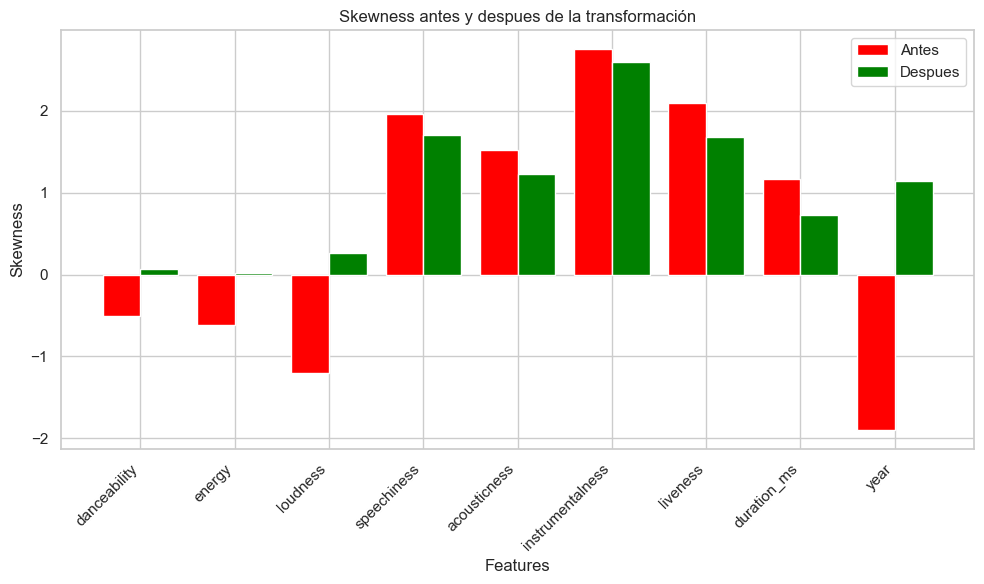

In [236]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])

def remove_skewness(feature, df_scaled):

    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]
    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []

#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df_scaled[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  
skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]

#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)

#Graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

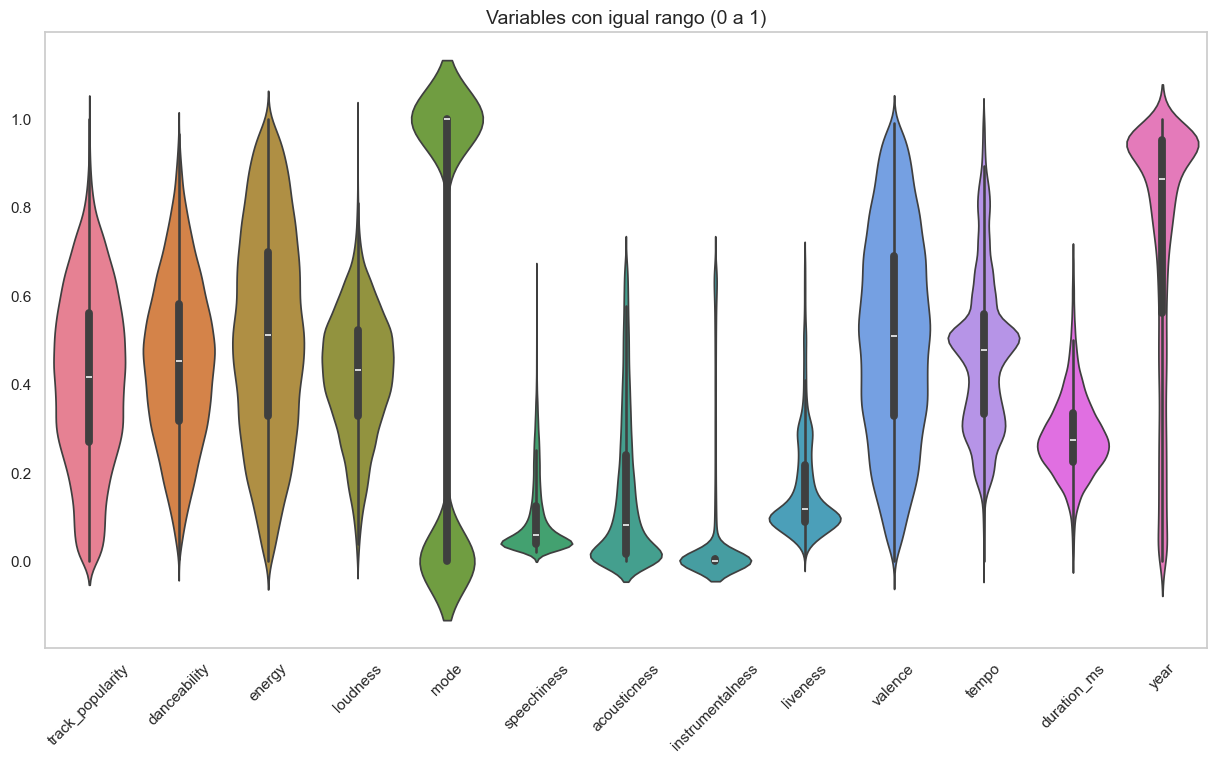

In [237]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df_scaled.drop('key', axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Análisis de Tonalidad ('Key')

Aplicamos One Hot Encoding para crear variables dummies del feature 'key' (cada entero representa una tonalidad diferente). 

In [238]:
df_scaled['key'] = df_scaled['key'].astype(int)

# Realizar el one-hot encoding para la variable key
one_hot_encoded = pd.get_dummies(df_scaled['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df_scaled, one_hot_encoded], axis=1)

Observamos la correlación de cada tonalidad con 'track_popularity'

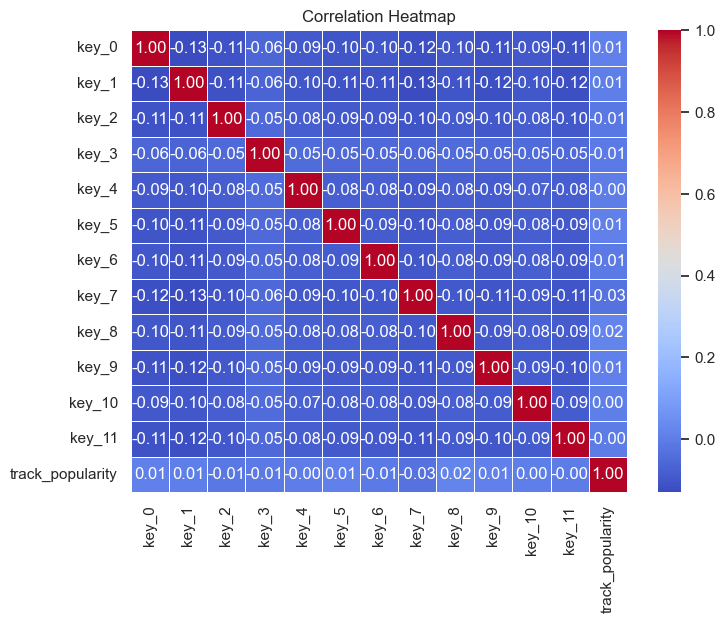

In [239]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]


corr_matrix = subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dado que la tonalidad (key) no presenta correlación con 'track_popularity' será desestimada.

In [240]:
df_scaled.drop(columns=['key'], inplace=True)

### One Hot Encoding para género

In [241]:
# Aplicar One Hot Encoding a la variable playlist_genre
df_scaled = pd.get_dummies(df_scaled, columns=['playlist_genre'], prefix='genre')
df_scaled.columns

Index(['track_id', 'track_popularity', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')

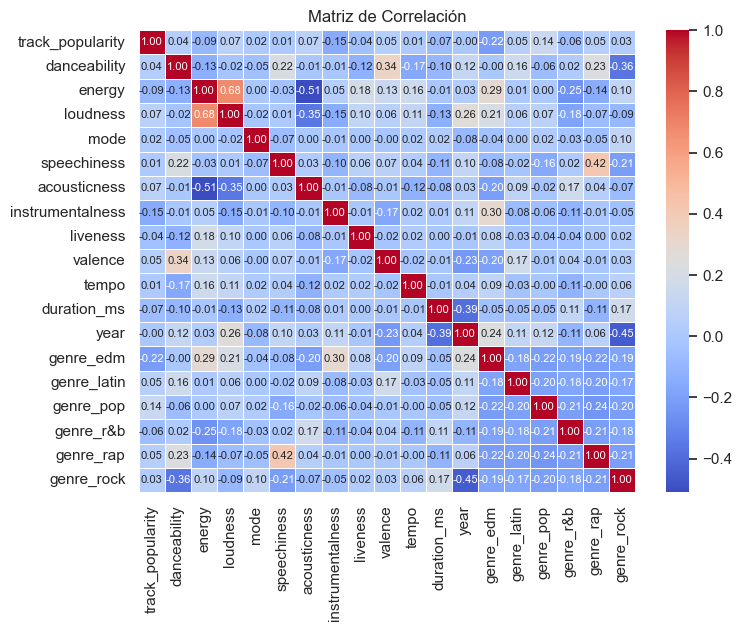

In [242]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

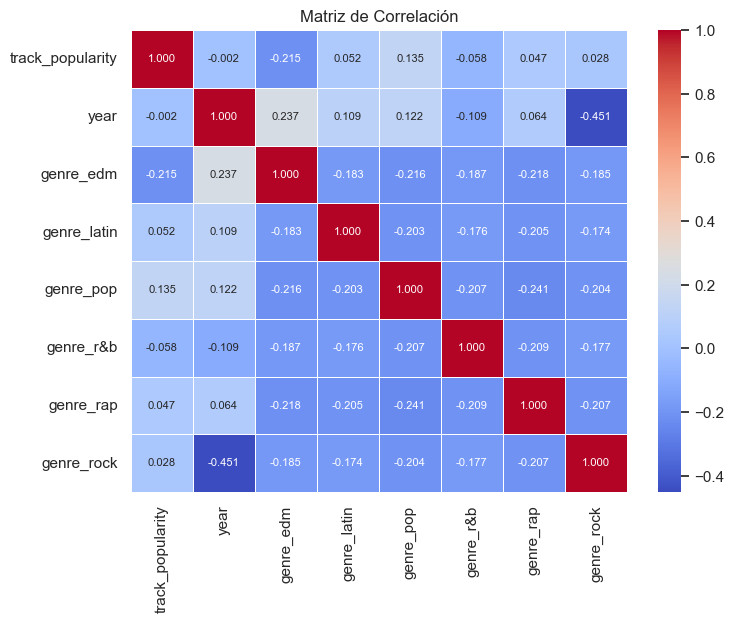

In [243]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])
numeric_df.drop(columns=['danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'], inplace=True)

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se observa una correlación entre el año y el género, particularmente "rock" y "edm". Esto se debe a que la cantidad de pistas de "rock" ha disminuido con los años.

"Edm" aparece en el dataset a partir del 2000, siendo el género más reciente.

In [244]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23081 entries, 0 to 32832
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          23081 non-null  object 
 1   track_popularity  23081 non-null  float64
 2   danceability      23081 non-null  float64
 3   energy            23081 non-null  float64
 4   loudness          23081 non-null  float64
 5   mode              23081 non-null  int64  
 6   speechiness       23081 non-null  float64
 7   acousticness      23081 non-null  float64
 8   instrumentalness  23081 non-null  float64
 9   liveness          23081 non-null  float64
 10  valence           23081 non-null  float64
 11  tempo             23081 non-null  float64
 12  duration_ms       23081 non-null  float64
 13  year              23081 non-null  float64
 14  genre_edm         23081 non-null  bool   
 15  genre_latin       23081 non-null  bool   
 16  genre_pop         23081 non-null  bool   
 17

In [245]:
#EXPORT
df_scaled.to_csv('df_scaled.csv', index=False)

## Reducción de la Dimensionalidad

### PCA (9 componentes)

En un primer lugar, comenzamos realizando un analisis de PCA para intentar reducir la cantidad de features de nuestro dataset sin perder una cantidad significativa de información. Para esto, utilizamos la función 'pca.explained_variance_ratio_' que nos permite encontrar que tanta varianza de 'track_popularity' es explicada por estas nuevas features

In [246]:
df_scaled.columns

Index(['track_id', 'track_popularity', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')

In [266]:
numerical_features = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'year', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock']

#Más representativas (Decission Tree): instrumentalness, year, genre_pop, loudness, duration_ms

"""
NOTAS:
1) Deben estar presentes 'energy', 'instrumentalness', 'duration_ms'; por ser las que presentan mayor correlación con 'track_popularity'
2) Descartado 'mode' por baja correlación general
3) Eliminación 'acousticness' por alta correlación con 'energy' y 'loudness':
       Incremento de varianza eliminando:
       'energy' -> +1,32%
       'loudness' -> +1,94%
       'acousticness' -> +4,07%
4) Eliminación 'duration_ms' por tener correlación con 'year':
       Incremento de varianza eliminando:
       'year' -> +3,13%
       'duration_ms' -> +5,5%
5) SE INCLUYE OneHot de 'Genre' (descartando un feature por ser dummies)
"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled[numerical_features])

pca = PCA(n_components=9)  # Reducción a 9 componentes principales
pca_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df['track_id'] = df_scaled['track_id']
pca_df['track_popularity'] = df_scaled['track_popularity']

In [267]:
explained_variance = pca.explained_variance_ratio_
for i in range(len(pca_df.columns[:-2])):
    print(f'Varianza explicada por el Componente Principal {i+1}: {explained_variance[i]:.2%}')

# Calcular la suma de la varianza de los componentes
sum_variance = sum(explained_variance[:i+1])
print(f'\nSuma de la varianza explicada por los Componentes 1 a {i+1}: {sum_variance:.2%}')

Varianza explicada por el Componente Principal 1: 14.84%
Varianza explicada por el Componente Principal 2: 14.03%
Varianza explicada por el Componente Principal 3: 11.09%
Varianza explicada por el Componente Principal 4: 10.37%
Varianza explicada por el Componente Principal 5: 8.31%
Varianza explicada por el Componente Principal 6: 7.91%
Varianza explicada por el Componente Principal 7: 6.96%
Varianza explicada por el Componente Principal 8: 6.68%
Varianza explicada por el Componente Principal 9: 6.17%

Suma de la varianza explicada por los Componentes 1 a 9: 86.37%


In [268]:
columns = pca_df.columns[:-2]
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, index=numerical_features, columns=pca_df.columns[:-2])

for i in range(len(columns)):
    print(f"\nVariables que más contribuyen a PC{i}:")
    print(loading_df[columns[i]].abs().sort_values(ascending=False))



Variables que más contribuyen a PC0:
energy              0.434931
danceability        0.433467
genre_rock          0.373147
genre_rap           0.360424
speechiness         0.336805
loudness            0.311878
genre_r&b           0.198731
tempo               0.197979
liveness            0.152174
genre_pop           0.137788
year                0.116147
valence             0.071577
genre_latin         0.057307
instrumentalness    0.019036
Name: PC0, dtype: float64

Variables que más contribuyen a PC1:
loudness            0.509352
year                0.426362
energy              0.390997
genre_rock          0.363280
genre_r&b           0.270690
speechiness         0.228868
danceability        0.224227
genre_latin         0.180672
genre_rap           0.161660
tempo               0.113337
liveness            0.104661
genre_pop           0.093825
valence             0.078467
instrumentalness    0.021396
Name: PC1, dtype: float64

Variables que más contribuyen a PC2:
valence             0.

In [270]:
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,track_id,track_popularity
0,-1.228247,-2.007737,0.636795,-1.357469,-1.137151,-1.301107,-0.040412,-0.705792,-0.603308,6f807x0ima9a1j3VPbc7VN,0.617978
1,-0.814656,-1.237786,0.390595,-1.321949,-1.275996,-0.900223,1.379120,0.766448,0.605321,0r7CVbZTWZgbTCYdfa2P31,0.629213
2,-1.380825,-1.835965,0.500640,-1.146859,-1.218530,-1.204166,-0.001245,-0.475784,-0.197209,1z1Hg7Vb0AhHDiEmnDE79l,0.662921
3,-1.276420,-1.840713,1.212820,-0.632802,-1.227607,-0.654282,0.240339,0.151130,-0.227065,75FpbthrwQmzHlBJLuGdC7,0.550562
4,-1.036401,-1.130778,0.537385,-1.468597,-1.034739,-1.504985,-0.175239,-0.388876,0.052818,1e8PAfcKUYoKkxPhrHqw4x,0.651685
...,...,...,...,...,...,...,...,...,...,...,...
23076,-2.032147,-1.249670,0.612877,0.407373,-0.416287,0.718305,-0.800785,-0.617422,-1.734487,5EDUIiDf1Sp6nVnmCMRxa2,0.561798
23077,-1.455409,-0.401508,0.262572,0.403759,-0.395744,0.920737,0.264700,0.628280,0.177206,4KW1lqgSr8TKrvBII0Brf8,0.707865
23078,-1.195079,-0.326452,0.268371,0.038108,-0.158542,0.353903,-0.403733,-0.186924,-0.545752,0wXuerDYiBnERgIpbb3JBR,0.786517
23079,-1.397474,-1.253266,0.346222,0.696516,-0.171992,1.010590,0.605149,-0.055784,-0.008036,NaN,NaN


In [271]:
#EXPORT
pca_df.to_csv('df_pca9.csv', index=False)

### PCA (6 componentes)

En un primer lugar, comenzamos realizando un analisis de PCA para intentar reducir la cantidad de features de nuestro dataset sin perder una cantidad significativa de información. Para esto, utilizamos la función 'pca.explained_variance_ratio_' que nos permite encontrar que tanta varianza de 'track_popularity' es explicada por estas nuevas features

In [280]:
df_scaled.columns

Index(['track_id', 'track_popularity', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')

In [281]:
numerical_features = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'year']

#Más representativas (Decission Tree): instrumentalness, year, genre_pop, loudness, duration_ms

"""
NOTAS:
1) Deben estar presentes 'energy', 'instrumentalness', 'duration_ms'; por ser las que presentan mayor correlación con 'track_popularity'
2) Descartado 'mode' por baja correlación general
3) Eliminación 'acousticness' por alta correlación con 'energy' y 'loudness':
       Incremento de varianza eliminando:
       'energy' -> +1,32%
       'loudness' -> +1,94%
       'acousticness' -> +4,07%
4) Eliminación 'duration_ms' por tener correlación con 'year':
       Incremento de varianza eliminando:
       'year' -> +3,13%
       'duration_ms' -> +5,5%
5) NO SE INCLUYE OneHot de 'Genre'
"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaled[numerical_features])

pca = PCA(n_components=6)  # Reducción a 6 componentes principales
pca_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['track_id'] = df_scaled['track_id']
pca_df['track_popularity'] = df_scaled['track_popularity']

In [282]:
explained_variance = pca.explained_variance_ratio_
for i in range(len(pca_df.columns[:-2])):
    print(f'Varianza explicada por el Componente Principal {i+1}: {explained_variance[i]:.2%}')

# Calcular la suma de la varianza de los componentes
sum_variance = sum(explained_variance[:i+1])
print(f'\nSuma de la varianza explicada por los Componentes 1 a {i+1}: {sum_variance:.2%}')

Varianza explicada por el Componente Principal 1: 20.60%
Varianza explicada por el Componente Principal 2: 16.84%
Varianza explicada por el Componente Principal 3: 14.13%
Varianza explicada por el Componente Principal 4: 11.64%
Varianza explicada por el Componente Principal 5: 10.84%
Varianza explicada por el Componente Principal 6: 10.45%

Suma de la varianza explicada por los Componentes 1 a 6: 84.50%


In [283]:
columns = pca_df.columns[:-2]
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, index=numerical_features, columns=pca_df.columns[:-2])

for i in range(len(columns)):
    print(f"\nVariables que más contribuyen a PC{i}:")
    print(loading_df[columns[i]].abs().sort_values(ascending=False))



Variables que más contribuyen a PC0:
loudness            0.638675
energy              0.637889
tempo               0.249153
liveness            0.239499
year                0.190589
danceability        0.163221
instrumentalness    0.047567
valence             0.022835
speechiness         0.002492
Name: PC0, dtype: float64

Variables que más contribuyen a PC1:
valence             0.612527
danceability        0.573629
speechiness         0.347103
instrumentalness    0.336891
tempo               0.156710
loudness            0.144662
year                0.084336
energy              0.068013
liveness            0.067545
Name: PC1, dtype: float64

Variables que más contribuyen a PC2:
year                0.734673
speechiness         0.352879
danceability        0.345174
valence             0.311222
instrumentalness    0.271956
liveness            0.139857
energy              0.119062
loudness            0.094695
tempo               0.055362
Name: PC2, dtype: float64

Variables que más contri

In [284]:
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,track_id,track_popularity
0,-1.857132,-0.653643,0.621619,-1.263517,-0.596871,-0.812058,6f807x0ima9a1j3VPbc7VN,0.617978
1,-1.010258,-0.698129,-0.014749,-0.410270,1.321001,-0.397733,0r7CVbZTWZgbTCYdfa2P31,0.629213
2,-1.877933,-0.550120,0.252759,-0.883555,-0.459042,-0.552848,1z1Hg7Vb0AhHDiEmnDE79l,0.662921
3,-1.826773,0.102045,0.812300,-0.143904,0.139718,-0.676533,75FpbthrwQmzHlBJLuGdC7,0.550562
4,-1.030455,-0.473479,-0.048592,-1.058530,-0.662907,-0.526060,1e8PAfcKUYoKkxPhrHqw4x,0.651685
...,...,...,...,...,...,...,...,...
23076,-2.397589,1.119227,-0.059800,-0.347088,-0.845068,-1.336459,5EDUIiDf1Sp6nVnmCMRxa2,0.561798
23077,-1.354424,0.938583,-0.749790,0.535879,0.617978,-0.394758,4KW1lqgSr8TKrvBII0Brf8,0.707865
23078,-1.033896,0.707011,-0.500979,-0.230325,-0.419068,-0.649763,0wXuerDYiBnERgIpbb3JBR,0.786517
23079,-1.974394,0.655825,0.133420,0.313765,0.711196,0.122901,NaN,NaN


In [286]:
#EXPORT
pca_df.to_csv('df_pca6.csv', index=False)

## Conclusiones



En conclusión:
1. Pudimos realizar una limpieza del dataset mediante diversas técnicas que nos permitieron simplificar la estructura del mismo. De esta manera, la cantidad de datos considerados como outliers fue eliminada del dataset mediante distintas tecnicas de poda. 
2. En una segunda etapa se identificaron los valores nulos y duplicados para que fuesen eliminados del dataset.
3. Se realizo un escalado de los datos dado que los mismos se encontraban con varios ordenes de diferencia entre si. Por esta razón, la cantidad de filas del dataset, después de haber sido trabajado, es un 70% del dataset original.
4. Aplicamos un proceso de corrección del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature numérico intentando aproximarlo a una distribución gausiana. Se utiliza la transformación que mejor se adapta a los datos.
5. Mediante tecnicas como la categorizacion de variables continuas y one-hot encoding se realizó una transformacion profunda de los datos de Tonalidad ('Key'). Este campo fue eliminado posteriormente debido a que no presentaban correlación con 'track_popularity'.
6. Se redujo la cantidad de features desde 23 hasta entre 3 y 5, dependiendo del dataset que se utilice. Lo mismo se realizo mediante diversas tecnicas como la eliminacion de features de tipo 'String', SelectKBest, DecisionTreeRegressor, etc.

A partir de este trabajo realizado, será posible desarrollar modelos que predigan con mayor o menor certeza el feature deseado ('track_popularity').